In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem Statement: Decision Tree Using the CART Algorithm

You are given a dataset,“car_evaluation.csv.”Load the dataset into a DataFrame without the header and rename the columns as the list given here -['buying',  'maint',  'doors',  'persons',  'lug_boot', 'safety',  'class'].

Considering  the class column  as  the  target variable, perform the following tasks:

1.Explore the target column,class(our task is to predict how the car features  affectthe  class  of  car  asVery  good,  Good,  Acceptable,  or  Unacceptable, whichis why we have considered this column as the target column)

2.Declare feature vectors and the target variable

3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)

4.Encode all     the     ordinal     data     into     numeric     values     using     the category_encoderslibrary

5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria

6.Check the accuracy score of the model based on the Gini Index

7.Visualize the decision tree


8.Show how the importance of features affects the target variable


In [3]:
df_car=pd.read_csv("car_evaluation.csv")

In [4]:
df_car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df_car.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
df_car['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()

In [12]:
for col in df_car.columns:
  df_car[col]=lb.fit_transform(df_car[col])

In [13]:
x=df_car.drop('class',axis=1)
y=df_car['class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
df_tree=DecisionTreeClassifier(criterion="gini",max_features=3,max_depth=8)

In [18]:
df_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features=3)

In [19]:
y_Pred=df_tree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        77
           1       0.44      0.47      0.45        15
           2       0.96      0.95      0.96       237
           3       0.57      0.47      0.52        17

    accuracy                           0.85       346
   macro avg       0.65      0.64      0.65       346
weighted avg       0.85      0.85      0.85       346



<AxesSubplot:>

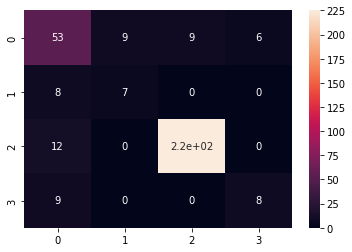

In [22]:
sns.heatmap(confusion_matrix(y_test,y_Pred),annot=True)

In [23]:
from sklearn.tree import plot_tree

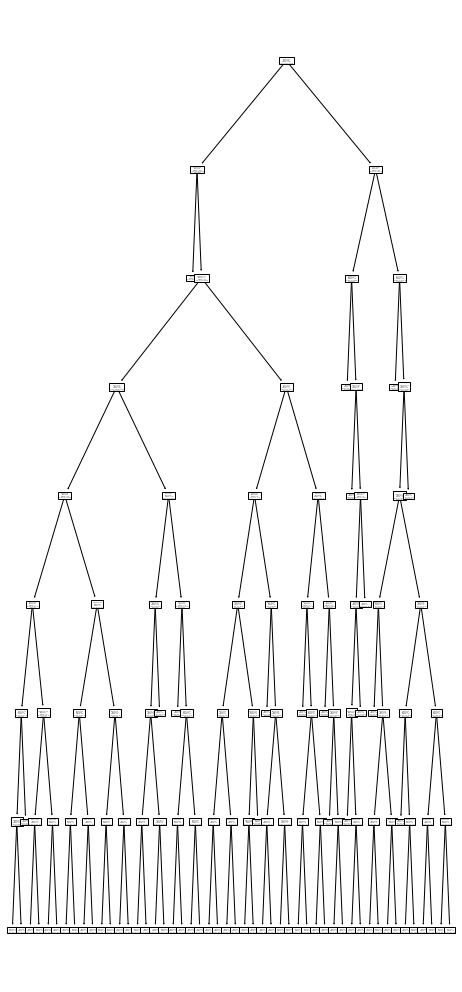

In [24]:
plt.figure(figsize=(8,18))
plot_tree(df_tree,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

## Problem Statement: Random Forest

Write a Python program that reads the TaxiFare.csv file into  a  DataFrame  and  build  a  good  random  forest  model  by  performing the following tasks:

1.Load the TaxiFare.csvdataset into a DataFrame

2.Drop ‘unique_id’, and find missing values from the dataset

3.Convert the ‘date_time_of_pickup’ column to date and time format and  extract  information  and  create  new  columns  as  ‘hour‘, ‘dayOfTheMonth’,’ month’,   ‘dayOfTheWeek’.

4.Find   traveling   distance   based   on   given   coordinates   using   the "Haversine" distance formula and create anew column as ‘distance’ and store the data.

Note:The  Haversine  formula  calculates  the  shortest  distance  between two  points  on  a  sphere  using  their  latitudes  and  longitudes  measured along the surface. It is important for use in navigation.

5.Eliminate some anomalous/outlier data based on certain "Domain" logic

A.Amount < 2.5 as the minimum fare is 2.5

B.Trips with travel distance less than or equal to 1, and more than 130 Kms.
Let’s say this was a condition provided by clients based on travel range.

6.Extract independent variables (Xs) and dependent variables (Ys) into separate data objects

7.Find important features using random forest.

8.Build  a  model  and  predict  the  result  for  the  test  dataset  based  on MAPE and RMSE


In [29]:
df_taxifare=pd.read_csv("TaxiFare.csv")

In [30]:
df_taxifare

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,26:21.0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,4.5
1,52:16.0,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,16.9
2,35:00.0,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,5.7
3,30:42.0,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,7.7
4,51:00.0,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5.3
...,...,...,...,...,...,...,...,...
49995,25:15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,15.0
49996,19:18.0,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,7.5
49997,53:00.0,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,6.9
49998,09:00.0,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,4.5


In [31]:
df_taxifare.drop('unique_id',axis=1,inplace=True)

In [32]:
df_taxifare['date_time_of_pickup'] = pd.to_datetime(df_taxifare['date_time_of_pickup'])

In [33]:
df_taxifare['date_time_of_pickup']

0       2009-06-15 17:26:21+00:00
1       2010-01-05 16:52:16+00:00
2       2011-08-18 00:35:00+00:00
3       2012-04-21 04:30:42+00:00
4       2010-03-09 07:51:00+00:00
                   ...           
49995   2013-06-12 23:25:15+00:00
49996   2015-06-22 17:19:18+00:00
49997   2011-01-30 04:53:00+00:00
49998   2012-11-06 07:09:00+00:00
49999   2010-01-13 08:13:14+00:00
Name: date_time_of_pickup, Length: 50000, dtype: datetime64[ns, UTC]

In [34]:
df_taxifare['hour'] = df_taxifare['date_time_of_pickup'].dt.hour

In [35]:
df_taxifare['hour'][0]

17

In [36]:
df_taxifare["dayOfTheMonth"]=df_taxifare['date_time_of_pickup'].dt.day

In [37]:
df_taxifare['month']=df_taxifare['date_time_of_pickup'].dt.month

In [38]:
df_taxifare['dayOfTheWeek']=df_taxifare['date_time_of_pickup'].dt.dayofweek

In [39]:
df_taxifare.drop('date_time_of_pickup',axis=1,inplace=True)

In [40]:
import math
# distance between latitudes
# and longitudes
def haversine(lat1,lat2,lon1,lon2):
  dLat = (lat2 - lat1) * math.pi / 180.0
  dLon = (lon2 - lon1) * math.pi / 180.0

# convert to radians
  lat1 = (lat1) * math.pi / 180.0
  lat2 = (lat2) * math.pi / 180.0

# apply formulae
  a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2));
  rad = 6371
  c = 2 * math.asin(math.sqrt(a))
  return rad * c

In [41]:
df_taxifare[['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff']]=df_taxifare[['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff']].astype('int')

In [42]:
df_taxifare["distance"]=df_taxifare.apply(lambda row: haversine(row['latitude_of_pickup'], row['longitude_of_pickup'], row['latitude_of_dropoff'], row['longitude_of_dropoff']), axis=1)

In [43]:
df_taxifare=df_taxifare[df_taxifare["amount"]<2.5]

In [44]:
df_taxifare=df_taxifare[(df_taxifare["distance"]<130000)&(df_taxifare["distance"]>=1)]

In [45]:
df_taxifare

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,hour,dayOfTheMonth,month,dayOfTheWeek,distance
2039,-73,40,-73,40,1,-2.90,23,9,3,1,14967.371654
2486,-74,40,-73,40,1,-2.50,5,22,3,6,14951.082535
2780,-73,40,-73,40,1,0.01,15,1,5,4,14967.371654
10002,-73,40,-74,40,1,0.00,14,15,2,0,14999.529789
13032,-73,40,-73,40,4,-3.00,8,30,8,4,14967.371654
27891,-74,40,-74,40,1,0.00,21,15,5,4,14981.319002
28839,-73,40,0,0,1,-2.50,13,11,8,6,12565.026711
36722,-73,40,-73,40,1,-2.50,15,30,4,3,14967.371654
42337,-73,40,-73,40,1,-5.00,10,9,3,0,14967.371654
47302,-73,40,-73,40,1,0.00,19,18,3,3,14967.371654


In [47]:
x=df_taxifare.drop('no_of_passenger',axis=1)
y=df_taxifare['no_of_passenger']

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf=RandomForestClassifier(n_estimators=50,criterion="gini",max_features=4,max_depth=10)

In [49]:
rf.fit(x,y)

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=50)

In [50]:
features_importances=rf.feature_importances_

In [51]:
df_col=list(df_taxifare.columns)

In [52]:
dict(zip(df_col,features_importances))

{'longitude_of_pickup': 0.0238095238095238,
 'latitude_of_pickup': 0.0,
 'longitude_of_dropoff': 0.0,
 'latitude_of_dropoff': 0.0,
 'no_of_passenger': 0.17076719576719576,
 'amount': 0.22711640211640213,
 'hour': 0.28703703703703703,
 'dayOfTheMonth': 0.20555555555555555,
 'month': 0.06984126984126986,
 'dayOfTheWeek': 0.015873015873015872}

In [53]:
df_taxifare.drop(['latitude_of_pickup','latitude_of_dropoff','longitude_of_pickup','longitude_of_dropoff','month'],axis=1,inplace=True)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23)

In [55]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=50)

In [56]:
y_pred=rf.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred)

1.0

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.0

In [60]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape

0.0

#use this function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

## Problem Statement: Naïve Bayes Classification

Write a Python program that reads the mobile price.csv file into a DataFrame, by doing the given task builds good naïve Bayes models.

1.Load the mobile price.csvdataset into a DataFrame

2.Check the data type of each column and change it according to their data

3.Find missing values and treat themif you found any

4.Plot bar graph for target variable and their categories with help of seaborn

5.Extract   independent   variables   (Xs)   and   dependent   variables   (Ys)   into separate data objects6

.Split data into train and test DataFrame and set test size as 0.27.

Build Gaussian and Bernoulli models, compare their accuracy

In [61]:
df_mp=pd.read_csv("mobile price.csv")
df_mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [62]:
df_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:xlabel='price_range', ylabel='count'>

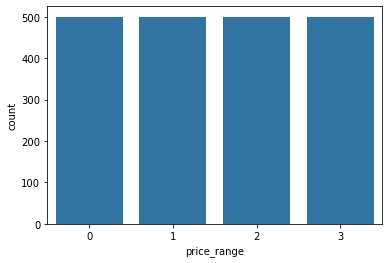

In [63]:
sns.countplot(x='price_range', data=df_mp)

In [64]:
x=df_mp.drop('price_range',axis=1)
y=df_mp['price_range']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=23)

In [66]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [67]:
gnb=GaussianNB()

In [68]:
gnb.fit(x_train,y_train)

GaussianNB()

In [69]:
y_gauss=gnb.predict(x_test)

In [70]:
accuracy_score(y_test,y_gauss)

0.825925925925926

In [71]:
bnb=BernoulliNB()

In [72]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [73]:
y_bnb=bnb.predict(x_test)

In [74]:
accuracy_score(y_test,y_bnb)

0.2037037037037037